In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
Path='/home/mgander/Atlantic/data/copied_data/'

In [5]:
file='fNCI60_GluC'
df=pd.read_pickle(f'{Path}/{file}.pkl')
df=df[~np.isnan(df['Intensity'])].copy()

In [6]:
df['CCL']=[a.split('_')[0] for a in df['Experiment']]
df['CCL']=df['CCL'].astype('category')
df

,Modified sequence,Proteins,Gene names,Type,Experiment,Retention time,PEP,Intensity,id,Protein group IDs,Peptide ID,Mod. peptide ID,MS/MS IDs,CCL
0,_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGE_,Q86U42-2;Q86U42,PABPN1,MULTI-MSMS,A549_GluC,48.181,2.536100e-04,126980000.0,0,4546,0,0,0,A549
1,_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGE_,Q86U42-2;Q86U42,PABPN1,MULTI-MSMS,BT549_GluC,48.212,1.566000e-08,145880000.0,1,4546,0,0,1;2,BT549
2,_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGE_,Q86U42-2;Q86U42,PABPN1,MULTI-MSMS,CCRFCEM_GluC,47.002,3.950000e-06,342730000.0,2,4546,0,0,3,CCRFCEM
3,_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGE_,Q86U42-2;Q86U42,PABPN1,MULTI-MSMS,DU145_GluC,47.200,2.058900e-12,212330000.0,3,4546,0,0,4,DU145
4,_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGE_,Q86U42-2;Q86U42,PABPN1,MULTI-MSMS,HCC2998_GluC,42.246,4.539800e-04,71450000.0,4,4546,0,0,5,HCC2998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729320,_YYYRRALE_,Q9H0B6;Q9H0B6-2,KLC2,MULTI-MATCH,NCIH23_GluC,30.929,NaN,15293000.0,3729320,6333,88029,99813,NaN,NCIH23
3729321,_YYYRRALE_,Q9H0B6;Q9H0B6-2,KLC2,MULTI-MATCH,NCIH460_GluC,30.919,NaN,54122000.0,3729321,6333,88029,99813,NaN,NCIH460
3729322,_YYYRRALE_,Q9H0B6;Q9H0B6-2,KLC2,MULTI-MATCH,NCIH460_GluC,30.891,NaN,27615000.0,3729322,6333,88029,99813,NaN,NCIH460
3729323,_YYYRRALE_,Q9H0B6;Q9H0B6-2,KLC2,MULTI-MATCH,SNB75_GluC,32.929,NaN,4359400.0,3729323,6333,88029,99813,NaN,SNB75


In [7]:
# Some intensities are nan, which is a little weird

In [8]:
mods=sorted(set(df['Modified sequence']))
ccls=sorted(set(df['CCL']))

In [9]:
D_mod_to_ind={mods[i]:i for i in range(len(mods))}

In [10]:
M=np.full((len(mods), len(ccls)), np.NaN)

In [11]:
for i,ccl in enumerate(ccls):
    print(i)
    dfc=df[df['CCL']==ccl].copy()
    dfcs=dfc[['Modified sequence', 'Intensity']].copy()
    ints=dfcs.groupby('Modified sequence').mean()
    indices=[D_mod_to_ind[a] for a in ints.index]
    M[indices, i:i+1]=np.array(ints.values)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [12]:
Df=pd.DataFrame(data=M, columns=ccls, index=mods)

In [13]:
Df

,786O,A498,A549,ACHN,BT549,CAKI1,CCRFCEM,COLO205,DU145,EKVX,...,SNB19,SNB75,SR,SW620,T47D,TK10,U031,U251,UACC257,UACC62
_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDYGNGLE_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42761000.0,56720000.0,34537000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGE_,142900000.0,88173500.0,138100000.0,190610000.0,141485000.0,33930000.0,129180000.0,NaN,116360000.0,186110000.0,...,98493000.0,101464500.0,197240000.0,174045000.0,216670000.0,127280500.0,104860000.0,1.306120e+08,111480000.0,78837000.0
_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGE_,117890000.0,100360000.0,126980000.0,266870000.0,145880000.0,NaN,342730000.0,NaN,212330000.0,239260000.0,...,79908000.0,NaN,190720000.0,223135000.0,163040000.0,137490000.0,NaN,1.263900e+08,101350000.0,139240000.0
_(ac)AAAAAAGAASGLPGPVAQGLKE_,3833200.0,NaN,9880400.0,11810000.0,6324900.0,7105600.0,8141400.0,7376200.0,12738000.0,12599000.0,...,5393400.0,9447100.0,9388400.0,8199400.0,12936500.0,11856000.0,3901600.0,9.391500e+06,7780300.0,10542000.0
_(ac)AAAAAATAAAAASIRE_,732520.0,7291000.0,5399000.0,NaN,5362400.0,7788550.0,9061800.0,8202850.0,15359470.0,9370150.0,...,6057250.0,8490800.0,11346000.0,5625000.0,10554450.0,6635600.0,5743500.0,4.385167e+06,9595900.0,6693350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_YYVAAVYEHPSILSLNPLALISRQE_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_YYVDDPPRIVLDKLE_,NaN,NaN,NaN,NaN,NaN,NaN,126230000.0,6172000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_YYVDDPPRIVLD_,NaN,NaN,3796500.0,NaN,NaN,NaN,63746000.0,2501700.0,NaN,NaN,...,NaN,4284700.0,NaN,NaN,NaN,5670500.0,NaN,NaN,NaN,NaN
_YYYQRALE_,NaN,NaN,NaN,NaN,250400500.0,189240000.0,NaN,NaN,396050000.0,NaN,...,NaN,NaN,NaN,NaN,158950000.0,NaN,100510000.0,1.024800e+08,NaN,187520000.0


In [14]:
np.isnan(Df).sum().sum()/Df.size

0.633833906339798

In [15]:
# Only take peptides that are there in at least 50%

In [16]:
peps_kept=np.where(list(np.isnan(Df).sum(1)/Df.shape[1]<0.5))[0]

In [17]:
Dfs=Df.iloc[peps_kept]
Dfs

,786O,A498,A549,ACHN,BT549,CAKI1,CCRFCEM,COLO205,DU145,EKVX,...,SNB19,SNB75,SR,SW620,T47D,TK10,U031,U251,UACC257,UACC62
_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGE_,142900000.0,88173500.0,138100000.0,190610000.0,141485000.0,3.393000e+07,129180000.0,NaN,116360000.0,1.861100e+08,...,98493000.0,101464500.0,197240000.0,174045000.0,216670000.0,1.272805e+08,104860000.0,1.306120e+08,111480000.0,78837000.0
_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGE_,117890000.0,100360000.0,126980000.0,266870000.0,145880000.0,NaN,342730000.0,NaN,212330000.0,2.392600e+08,...,79908000.0,NaN,190720000.0,223135000.0,163040000.0,1.374900e+08,NaN,1.263900e+08,101350000.0,139240000.0
_(ac)AAAAAAGAASGLPGPVAQGLKE_,3833200.0,NaN,9880400.0,11810000.0,6324900.0,7.105600e+06,8141400.0,7376200.0,12738000.0,1.259900e+07,...,5393400.0,9447100.0,9388400.0,8199400.0,12936500.0,1.185600e+07,3901600.0,9.391500e+06,7780300.0,10542000.0
_(ac)AAAAAATAAAAASIRE_,732520.0,7291000.0,5399000.0,NaN,5362400.0,7.788550e+06,9061800.0,8202850.0,15359470.0,9.370150e+06,...,6057250.0,8490800.0,11346000.0,5625000.0,10554450.0,6.635600e+06,5743500.0,4.385167e+06,9595900.0,6693350.0
_(ac)AAAAAQGGGGGEPRRTE_,45462000.0,41649000.0,19283000.0,137330000.0,28592000.0,4.378500e+07,137250000.0,61068000.0,58174000.0,6.874500e+07,...,58653000.0,89328000.0,58133000.0,57209000.0,149030000.0,8.664900e+07,44927000.0,3.101200e+07,60841000.0,101390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_YYRRFLKE_,100599150.0,NaN,309890000.0,140397500.0,22473000.0,5.985367e+07,335182500.0,61231500.0,11948000.0,1.032415e+08,...,207570000.0,109410000.0,250620000.0,82915500.0,NaN,6.392057e+07,120660000.0,NaN,2934600.0,NaN
_YYSRADAE_,NaN,NaN,NaN,NaN,NaN,4.663600e+07,112310000.0,NaN,37801000.0,1.687900e+07,...,36797000.0,24584000.0,45629000.0,16263000.0,28161000.0,2.004600e+07,18871000.0,1.324400e+07,14101000.0,19162000.0
_YYSSRSQSGGYSDRSSGGSYRDSYDSYATHNE_,28758000.0,NaN,NaN,NaN,19436000.0,NaN,49349750.0,NaN,28478000.0,4.793167e+07,...,59012500.0,34040000.0,38380000.0,65492000.0,55845500.0,NaN,27961500.0,3.195700e+07,47665000.0,39216000.0
_YYTLRYADGPQLYITE_,3797300.0,4622800.0,7717000.0,8046800.0,9472350.0,1.203625e+07,10426250.0,NaN,9542800.0,1.683400e+07,...,9141100.0,7334100.0,5558400.0,NaN,NaN,NaN,5502700.0,NaN,NaN,8528700.0


In [18]:
# Z transfrom each peptide

In [19]:
Dfs=Dfs-np.nanmean(Dfs, axis=1)[:,None]
Dfs=Dfs/np.nanstd(Dfs, axis=1)[:,None]
Dfs

,786O,A498,A549,ACHN,BT549,CAKI1,CCRFCEM,COLO205,DU145,EKVX,...,SNB19,SNB75,SR,SW620,T47D,TK10,U031,U251,UACC257,UACC62
_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGE_,0.091161,-0.515336,0.037966,0.619899,0.075479,-1.116481,-0.060889,NaN,-0.202964,0.570028,...,-0.400972,-0.368041,0.693375,0.436320,0.908704,-0.081940,-0.330411,-0.045019,-0.257046,-0.618806
_(ac)AAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGE_,-0.385695,-0.602908,-0.273061,1.460311,-0.038872,NaN,2.400290,NaN,0.784508,1.118197,...,-0.856328,NaN,0.516739,0.918392,0.173757,-0.142832,NaN,-0.280372,-0.590641,-0.121148
_(ac)AAAAAAGAASGLPGPVAQGLKE_,-1.114621,NaN,-0.153664,0.152967,-0.718667,-0.594606,-0.430008,-0.551605,0.300435,0.278347,...,-0.866691,-0.222520,-0.231848,-0.420791,0.331979,0.160277,-1.103752,-0.231355,-0.487390,-0.048530
_(ac)AAAAAATAAAAASIRE_,-2.002146,-0.063726,-0.622924,NaN,-0.633742,0.083330,0.459651,0.205780,2.320986,0.550786,...,-0.428372,0.290886,1.134768,-0.556128,0.900817,-0.257436,-0.521104,-0.922572,0.617509,-0.240367
_(ac)AAAAAQGGGGGEPRRTE_,-0.519957,-0.622556,-1.224371,1.951990,-0.973888,-0.565081,1.949837,-0.100037,-0.177908,0.106532,...,-0.165019,0.660371,-0.179011,-0.203874,2.266808,0.588286,-0.534353,-0.908772,-0.106145,0.984931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_YYRRFLKE_,-0.328332,NaN,1.664476,0.050617,-1.072227,-0.716299,1.905304,-0.703179,-1.172443,-0.303172,...,0.690214,-0.244437,1.100124,-0.496711,NaN,-0.677575,-0.137318,NaN,-1.258266,NaN
_YYSRADAE_,NaN,NaN,NaN,NaN,NaN,0.876766,3.691332,NaN,0.498127,-0.398519,...,0.455099,-0.068309,0.833609,-0.424919,0.084989,-0.262792,-0.313149,-0.554303,-0.517575,-0.300677
_YYSSRSQSGGYSDRSSGGSYRDSYDSYATHNE_,-0.498812,NaN,NaN,NaN,-0.990220,NaN,0.586679,NaN,-0.513572,0.511925,...,1.096049,-0.220372,0.008410,1.437615,0.929101,NaN,-0.540800,-0.330177,0.497868,0.052480
_YYTLRYADGPQLYITE_,-1.048276,-0.931061,-0.491705,-0.444875,-0.242457,0.121600,-0.107009,NaN,-0.232453,0.802849,...,-0.289492,-0.546074,-0.798212,NaN,NaN,NaN,-0.806121,NaN,NaN,-0.376449


<AxesSubplot:xlabel='_(ac)AAAAAATAAAAASIRE_', ylabel='Count'>

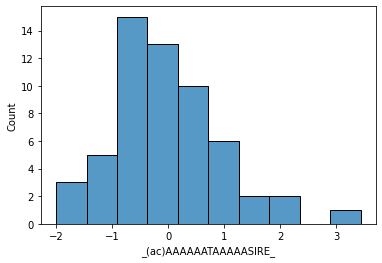

In [21]:
sns.histplot(Dfs.loc['_(ac)AAAAAATAAAAASIRE_'])

In [22]:
Dfs.to_pickle(f'{Path}/G_F_M.pkl')